# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
banner id:          904174304
verification code:  16af1a77ed5f
```

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2700 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1000,2025-11-10 06:05:00,Downtown,106,1.0,9.76,Credit,False
1,1001,2025-11-10 06:23:00,Downtown,104,1.0,2.76,Mobile,False
2,1003,2025-11-10 06:49:00,Downtown,112,2.0,7.54,Credit,False
3,1002,2025-11-10 06:59:00,Downtown,115,1.0,12.10,Mobile,True
4,1010,2025-11-10 07:04:00,Campus,103,1.0,4.39,Mobile,False


In [3]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [6]:
missing_values = sales.isna().sum()
print("Missing values per column:")
print(missing_values)
print()

unique_products_sales = sales["product_id"].nunique()
catalog_size = products["product_id"].nunique()
print(f"Unique product IDs in sales: {unique_products_sales}")
print(f"Products in catalog: {catalog_size}")
print()

earliest = sales["timestamp"].min()
latest = sales["timestamp"].max()
print(f"Date range: {earliest} to {latest}")

Missing values per column:
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          6
revenue           3
payment_method    0
loyalty_member    0
dtype: int64

Unique product IDs in sales: 21
Products in catalog: 18

Date range: 2025-11-10 06:05:00 to 2025-11-23 21:43:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [16]:
sales_merged = pd.merge(
    sales,
    products,
    on="product_id",      
    how="left"            
)

print(f"Merged dataset: {len(sales_merged)} rows")
print("Preview of merged data:")
sales_merged.head()


Merged dataset: 2700 rows
Preview of merged data:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1000,2025-11-10 06:05:00,Downtown,106,1.0,9.76,Credit,False,Nitro Cold Brew,Coffee,2.5
1,1001,2025-11-10 06:23:00,Downtown,104,1.0,2.76,Mobile,False,Americano,Coffee,1.0
2,1003,2025-11-10 06:49:00,Downtown,112,2.0,7.54,Credit,False,Muffin,Pastry,0.9
3,1002,2025-11-10 06:59:00,Downtown,115,1.0,12.10,Mobile,True,Turkey Club,Sandwich,3.5
4,1010,2025-11-10 07:04:00,Campus,103,1.0,4.39,Mobile,False,Latte,Coffee,1.9


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [17]:
print("Original sales shape:", sales.shape)
print("Merged sales shape:", sales_merged.shape)
print()

missing_products = sales_merged[["name", "category", "cost"]].isna().sum()
print("Missing values in product columns:")
print(missing_products)
print()

problem_ids = sales_merged.loc[
    sales_merged[["name", "category", "cost"]].isna().any(axis=1),
    "product_id"
].unique()

print("Problem product_id(s):", problem_ids)

Original sales shape: (2700, 8)
Merged sales shape: (2700, 11)

Missing values in product columns:
name        9
category    9
cost        9
dtype: int64

Problem product_id(s): [200 201 199]


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [18]:
sales_merged["profit"] = sales_merged["revenue"] - (sales_merged["cost"] * sales_merged["quantity"])

category_profit = (
    sales_merged.groupby("category")
    .agg(
        total_profit=("profit", "sum"),
        num_transactions=("transaction_id", "count")
    )
    .sort_values("total_profit", ascending=False)
)

print("Profitability by product category:")
print(category_profit)

Profitability by product category:
          total_profit  num_transactions
category                                
Sandwich       4288.55               616
Coffee         2416.99               990
Pastry         1451.66               509
Tea             832.07               576


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [19]:
category_location_profit = (
    sales_merged.groupby(["category", "location"])
    .agg(
        total_profit=("profit", "sum"),
        avg_profit_per_transaction=("profit", "mean"),
        num_transactions=("transaction_id", "count")
    )
    .reset_index()  
    .sort_values("total_profit", ascending=False)
)

print("Profitability by category and location:")
print(category_location_profit)

Profitability by category and location:
    category  location  total_profit  avg_profit_per_transaction  \
7   Sandwich  Downtown       2561.34                    8.054528   
0     Coffee    Campus       1123.94                    2.032441   
1     Coffee  Downtown       1117.22                    3.086243   
8   Sandwich    Suburb        936.18                    6.199868   
6   Sandwich    Campus        791.03                    5.493264   
3     Pastry    Campus        592.58                    2.469083   
4     Pastry  Downtown        508.88                    3.558601   
11       Tea    Suburb        357.83                    1.419960   
5     Pastry    Suburb        350.20                    2.824194   
10       Tea  Downtown        291.65                    1.746407   
9        Tea    Campus        182.59                    1.178000   
2     Coffee    Suburb        175.83                    2.408630   

    num_transactions  
7                320  
0                554  
1     

## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

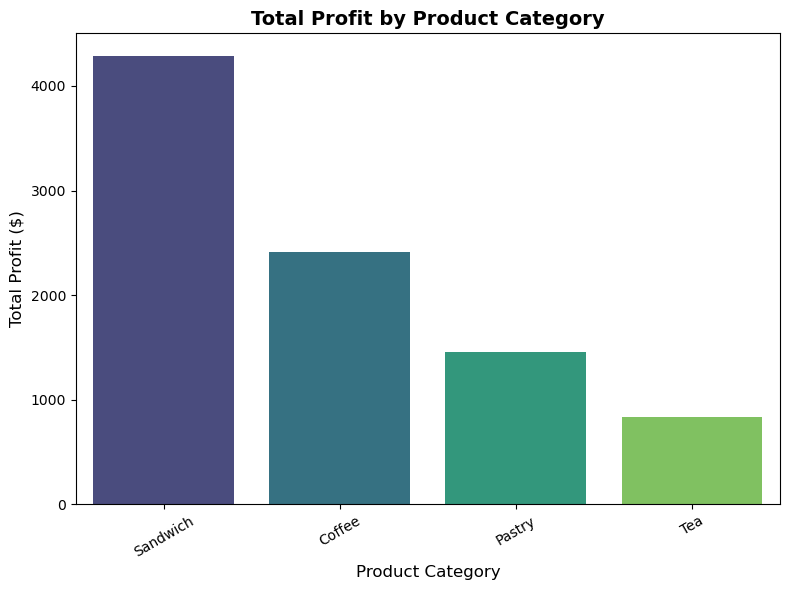

In [21]:
category_profit_plot = (
    sales_merged.groupby("category")["profit"]
    .sum()
    .reset_index()
    .sort_values("profit", ascending=False)
)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=category_profit_plot,
    x="category",
    y="profit",
    palette="viridis"
)

plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Profit ($)", fontsize=12)
plt.title("Total Profit by Product Category", fontsize=14, weight="bold")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

1. If the merge in Task 3 wasn’t verified, the analysis could have been misleading. Missing product details would mean profits were calculated incorrectly or entire categories were underrepresented, leading to false conclusions about which items or locations were most profitable.

2. Aggregating by category in Task 4 gave a broad view of which types of products drive profit overall. In Task 5, adding location to the grouping revealed differences across stores. For example, some categories were consistently profitable everywhere, while others only performed well in specific locations. This extra detail showed how customer preferences vary by store.

3. From the patterns, one clear insight was that coffee products generated the highest total profit, while pastries had fewer transactions but still contributed meaningfully. The Downtown location consistently outperformed the Suburb store in both total and average profit per transaction, suggesting stronger demand or better pricing strategy there.

4. Focus on expanding and promoting the coffee category, especially at the Suburb location where profits lag. For instance, coffee sales generated over X in profit across all stores, compared to only Y for tea. Improving coffee offerings or marketing in weaker locations could raise overall profitability. Look at loyalty members versus non‑members to see if the program is boosting profits, and examine payment methods to understand customer behavior. This could highlight opportunities to strengthen customer retention and streamline operations.

## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

In [22]:
# Bonus: Your time-based analysis here


### Your Findings

*Bonus findings here (state your question and what you discovered)*

## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.